<a href="https://colab.research.google.com/github/CMPSC-310-AI-Spring2023/activity08_classification-Stephen-Cullinan/blob/main/Copy_of_CMPSC_310_Activity8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity 8: Classification Example**

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np

Imports a dataset (MNIST is used here) via sklearn (and the fetch function within it) & OpenML.
This dataset involves images of handwritten digits. (~70,000 images).
Essentially it is the "hello world" dataset of machine learning.
Datasets generally returned in a (x,y) format as a numpy array.
x is 2-dimensional, y is 1-dimensional.
These lines of code end up printing out the labels within the datasets via the .keys() command



In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Returns two data points, which represent the X Values. AKA the input data

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

Shows what the y array looks like

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

Shows the y (target) data

In [ ]:
y.shape

(70000,)

Shows the array of X values


In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

generates a display of an image from the dataset.
sets the size of the image to the target 28x28 frame.
some_digit = X[num] selects which datapoint you want to look at, and can be changed to get a different image (data point).


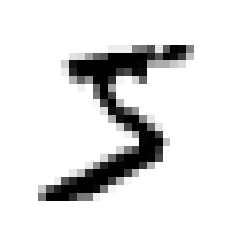

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

Shows the corresponding value to the number written in the image.

In [ ]:
y[0]

'5'

I missed what this line does

In [ ]:
y = y.astype(np.uint8)

Splits up the x and y arrays between training and testing. So the first 60,000 images will be used for training, and the last 60,000 are used for testing. 

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Cross-validation techniques tests effectiveness. 
Just testing one number here (tests if a number is the number 5 or not). 

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Stocastic Gradient Decent (SGD) classifier does training independently one at a time. Trains on the training set. Creates an instance of the classifier.
Fit function is for training.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Predict function is for testing. This run states whether the written value in the image fits within the set parameter (in this case it looks at whether it is a 5 or not). In this case, it is a 5, so it returns true.

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

Calculates forms to evaluate the model in terms of effectiveness and accuracy through assistance of sklearn. 
K-fold represents the number of splits used (here this is shown via cv=3) training set is split into 3, and trained 3 seperate times. 
Returns the accuracy of each of those 3 tests. 

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Classifies everything as the most frequent class. Which means it essentially guesses everything. This shows that the 95% we had with our other classifier is not that great if we compare it to a guessing bot that gets 90%.

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

Does the same thing, but returns the prediction for each test fold, rather than accuracy. 

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

returns those predictive classes in a prediction matrix. Each row is a class, each collumn is a predicted class. (Consider the matrix of false positives (Type 1 Error), false negatives (Type 2 Error), true positives, true negatives). 3530 = True Positives (correctly identified as 5), 53920 True Negatives (Correctly Identified as not 5).

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Shows what a perfect prediction would look like.

In [ ]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846